 # Proyect set up

In [2]:
import keypoint_moseq as kpms

project_dir = 'K:/keypoint-moseq/mi_project/'
config = lambda: kpms.load_config(project_dir) # Creates a config file that you can configurate from the notebook.

In [3]:
import os

### Setup from SLEAP

Here, I need to create a new directory and set up the project in it using the SLEAP data. I did this because if I referenced the `project_dir`, which contains `mi_proyect` (defined in the first code block), a new directory with the same name would be created, which isn’t possible. To avoid this, I would have had to overwrite the data, thereby losing the `config.yaml` file and the other files in the directory (at least that's what I believe).

**Config.yaml file is generated**: A new project is created in the specified directory (`new_directory`), and this process automatically generates a `config.yaml` file with a default structure. This file serves as the project's base configuration, including all the parameters needed to process and model the keypoint data.

**IN THE END, I MOVED AWAY FROM USING THAT "MI_PROYECT_2" DIRECTORY**: I simply copied the automatically generated `config.yaml` file and pasted it into the original `mi_proyect` directory. This config_auto file is interesting becouse has a basic estructure that I can use afterwards.

### Load data

In [18]:
import csv

with open('K:/file.csv', mode='r', newline='', encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for i, row in enumerate(spamreader):
        if i>=10:
            break
        print(','.join(row))

﻿"scorer,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000,DLC_resnet50_deeplabcut_singleanimal_1Sep14shuf

In [4]:
# load data (from sleap)
keypoint_data_path = os.path.join('K:/notes/Notes-tfm/721_bueno_3.csv')
coordinates, confidences, bodyparts = kpms.load_keypoints(keypoint_data_path, 'deeplabcut')

# format data for modeling
data, metadata = kpms.format_data(coordinates, confidences, **config())


oading keypoints: 100%|██████████████████| 1/1 [00:00<00:00, 15.03it/s]

In [23]:
keypoint_data_path = r"K:\keypoint-moseq\videos+coordinates\956_CropDLC_resnet50_deeplabcut_singleanimal_1Sep14shuffle1_200000.csv"

if os.path.exists(keypoint_data_path):
    print('existe')
else:
    print('no existe')

existe


##### kpms.check_nan_proportions(coordinates, bodyparts, breakdown=True)

### Handle missing data

NO LO HE SABIDO HACER
Objective: filter mising data (frames with no skeleton)

1) Extract data from sleap

In [5]:
import h5py

#load sleap file
sleap_file = 'K:/keypoint-moseq/mi_project/labels.v001.slp'
with h5py.File(sleap_file, "r") as f:   #File method opens a file. Accepts two arguments, r => allows to read file only
    print(f.keys()) #explore the keys inside the file

<KeysViewHDF5 ['frames', 'instances', 'metadata', 'points', 'pred_points', 'suggestions_json', 'tracks_json', 'videos_json']>


f.keys(): This returns a list of the main "keys" of the HDF5 file. Think of an HDF5 file as a file system. Each "key" is like the name of a folder within the file.

2. Extract keypoints

In [6]:
with h5py.File(sleap_file, "r") as f:
    points = f['points']
    print(f"points shape: {points.shape}")  
    print(f"points data: {points[:]}")

points shape: (14336,)
points data: [(962.93859544, 545.81607225,  True, False)
 (963.74223807, 541.21074202,  True, False)
 (944.83783109, 565.22685825,  True, False) ...
 (748.64318848, 405.25219727,  True, False)
 (736.56726074, 349.07540894,  True, False)
 (768.09338379, 376.72473145,  True, False)]


In [7]:
with h5py.File(sleap_file, "r") as f:
    pred_points = f['pred_points']
    print(f"pred_points shape: {pred_points.shape}")
    print(f"Pred_points data: {pred_points[:]}")  # Esto imprimirá los datos completos

pred_points shape: (18634,)
Pred_points data: [(1056.13061523, 200.81834412,  True, False, 0.99463373)
 (1095.88916016, 185.04275513,  True, False, 0.83424324)
 (1127.85217285, 177.20913696,  True, False, 0.64434266) ...
 ( 851.71289062, 664.1550293 ,  True, False, 0.98306268)
 ( 795.59356689, 648.03759766,  True, False, 0.89084828)
 ( 831.57391357, 631.99237061,  True, False, 0.90947521)]


Convierto datos h5py a pandas

In [8]:
import pandas as pd

In [9]:
with h5py.File(sleap_file, "r") as f:
    dataframes = {} #create dictionary for saving the DataFrames

    # iterate through the keys
    for key in f.keys():
        dataset = f[key]

         # Convertir el dataset a un DataFrame de pandas
        # Es importante verificar que el dataset tenga datos numéricos para convertirlo directamente
        try:
            df = pd.DataFrame(dataset[:])
            dataframes[key] = df
            print(f"DataFrame for {key}:")
            print(df.head())  # Imprimir las primeras filas del DataFrame
        except Exception as e:
            print(f"Error al convertir {key}: {e}")

DataFrame for frames:
   frame_id  video  frame_idx  instance_id_start  instance_id_end
0         0      0          0                  0                2
1         1      0       7168                  2                3
2         2      0       1724                  3                4
3         3      0      16464                  4                5
4         4      0       6203                  5                6
DataFrame for instances:
   instance_id  instance_type  frame_id  skeleton  track  from_predicted  \
0            0              0         0         0     -1              -1   
1            1              0         0         0     -1              -1   
2            2              0         1         0     -1              -1   
3            3              0         2         0     -1              -1   
4            4              0         3         0     -1              -1   

   score  point_id_start  point_id_end  tracking_score  
0    NaN               0            14     

In [10]:
if 'points' in dataframes:
    print(dataframes['points'].head())

            x           y  visible  complete
0  962.938595  545.816072     True     False
1  963.742238  541.210742     True     False
2  944.837831  565.226858     True     False
3  948.084794  559.839320     True     False
4  979.845097  534.500467     True     False


In [11]:
with h5py.File(sleap_file, "r") as f:
    points = f['points']
    # Mostrar las primeras filas para entender la estructura
    print(f"points shape: {points.shape}")
    print(f"points info: {points[0]}")  # Muestra las primeras entradas


points shape: (14336,)
points info: (962.93859544, 545.81607225, True, False)


Continuo sin filtrar NaNs

### Calibration

### Fit PCA

>=90.0% of variance exlained by 3 components.


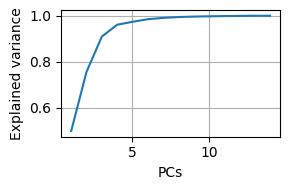

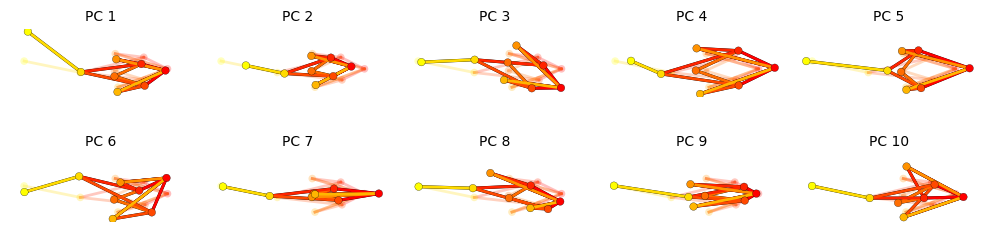

(None,)

In [5]:
pca = kpms.fit_pca(**data, **config())  #ajustar un modelo de PCA sobre los datos de los keypoints (Data) y las config. Encuentra los principales componentes que explican la mayor parte de la variabilidad de los keypoints
kpms.save_pca(pca, project_dir)  # guardar PCA

kpms.print_dims_to_explain_variance(pca, 0.9) # Muestra cuantos PCs (componentes principales) se necesitan para explicar el 90% de la varianza
kpms.plot_scree(pca, project_dir=project_dir) # visualización de cuanto afecta cada componente a la varianza (cuanto explica cada PC de la varianza)
kpms.plot_pcs(pca, project_dir=project_dir, **config()),   # Dibuja las poses promedio y cómo cambian en la dirección de cada PC.
                                                           #Las líneas/edges translúcidas representan la pose media.
                                                           #Las líneas/edges opacas representan una perturbación en la dirección del componente principal.

In [6]:
# Si ya ajustaste un modelo y quieres cargarlo sin recalcular:
# pca = kpms.load_pca(project_dir)
# Recupera el modelo PCA guardado en {project_dir}/pca.p para usarlo en otras partes del análisis.


In [7]:
kpms.update_config(project_dir, latent_dim=7)  # Reconfiguras el modelo para que este solo use 7 dimensiones, que es el número que te ha indicado el PCA.

# Model fitting

Auto-Regressive Hidden Markov Model (AR-HMM), que es un modelo especializado en aprender patrones de movimiento y predecirlos.

🔹 ¿Para qué sirve? → Permite identificar y segmentar movimientos repetitivos en los datos de poses. Es útil en estudios de comportamiento, biomecánica o análisis de video.

In [8]:
pip install -U jax

Note: you may need to restart the kernel to use updated packages.


In [9]:
from jax_moseq.utils.debugging import convert_data_precision

In [10]:
import jax

In [11]:
help(convert_data_precision)

Help on function convert_data_precision in module jax_moseq.utils.debugging:

convert_data_precision(data, x64=None)
    Convert all numerical data in a pytree to the specified precision.
    
    Note that converting to 64-bit precision is only possible if
    ``jax.config.x64_enabled`` is ``True``. To update this setting, use
    ``jax.config.update('jax_enable_x64', True)``.
    
    Parameters
    ----------
    data: pytree (dict, list, tuple, array, or any nested combination thereof)
        The data to convert.
    x64: bool, default=None
        If ``x64=True``, convert to 64-bit precision. If ``x64=False``,
        convert to 32-bit precision. If ``x64=None``, infer the desired
        precision from ``jax.config.x64_enabled``.
    
    Returns
    -------
    data: pytree
        The converted data.



In [12]:
# Verificar el tipo de data
print(type(data))  # Si imprime <class 'dict'>, entonces es un diccionario


<class 'dict'>


In [13]:
import jax.numpy as jnp

# Si `data` es un diccionario con arrays de jax.numpy
for key in data:
    data[key] = jnp.array(data[key], dtype=jnp.float64)  # Convertir los valores a float64


1. **Initialization**
 Auto-regressive (AR) parameters and syllable sequences are randomly initialized using pose trajectories from PCA  

In [14]:
# initialize the model
model = kpms.init_model(data, pca=pca, **config()) 

# optionally modify kappa
# model = kpms.update_hypparams(model, kappa=NUMBER)

2. **Fitting an AR-HMM**

Outputs will be saved to K:/keypoint-
moseq/mi_project/2025_02_19-14_35_41


 49%|█████████████████▏                 | 25/51 [00:07<00:08,  3.24it/s]

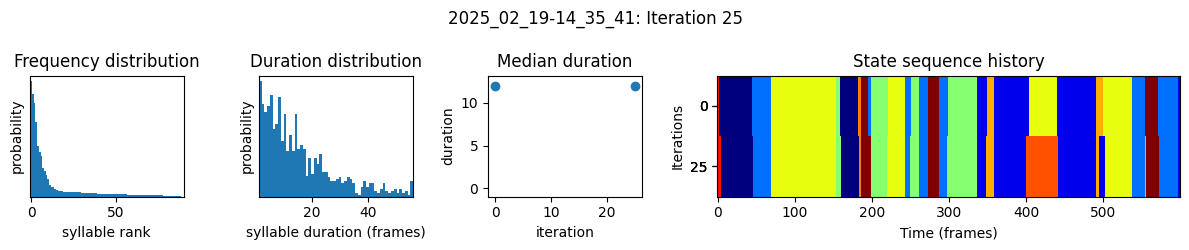

 98%|██████████████████████████████████▎| 50/51 [00:16<00:00,  3.30it/s]

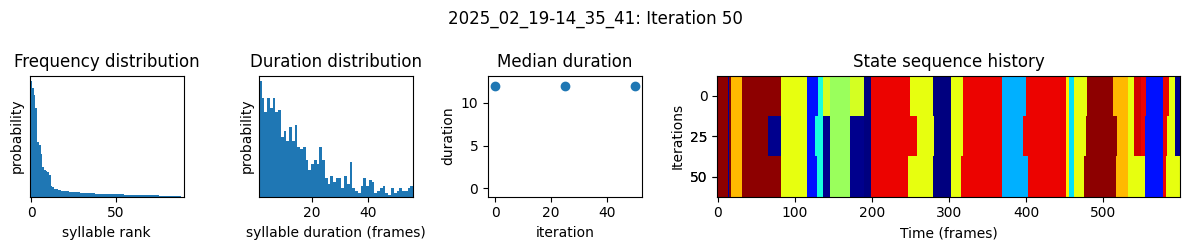


00%|███████████████████████████████████| 51/51 [00:16<00:00,  3.00it/s]

In [16]:
num_ar_iters = 50

model, model_name = kpms.fit_model(
    model, data, metadata, project_dir,
    ar_only=True, num_iters=num_ar_iters)